In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../JbiclustGE/simulated_data/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "DeBi"
tool_suffix = "DeBi"
n_runs = 1

parameters = (("p",["u"]),("b",[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5])) # b == binarization_level 

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap

img_outdir = "../simulated_datasets/results/J/img"
tsv_outdir = "../simulated_datasets/results/J/"



In [4]:
#for f_path in os.listdir("../JbiclustGE/simulated_data/DeBi/p=u,b=1.0/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT/Results_biclustering/"):
#    print(f_path)

In [5]:
for g in g_sizes:
    for s in s_sizes:
        params_folder = "p=u,b=1.0"
        pred_bic_fname = pred_bic_fname_prefix+str(g)+","+str(s)+pred_bic_fname_suffix
        bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
        bics = parse_JBiclustGE(bic_file_path,n_runs=n_runs)[0]
        print(g,"x",s,len(bics))

5 x 10 683
5 x 20 697
5 x 50 734
5 x 100 727
10 x 10 744
10 x 20 716
10 x 50 695
10 x 100 717
20 x 10 694
20 x 20 656
20 x 50 660
20 x 100 740
50 x 10 657
50 x 20 529
50 x 50 527
50 x 100 454
100 x 10 559
100 x 20 415
100 x 50 374
100 x 100 303


In [6]:
true_bic_fname = true_bic_fname_prefix+str(10)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)


params_folder = "p=u,b=1.0"
#params_folder = "prob_gene=0.99,pvalue_cond=0.05,pvalue_correl=0.05,zscore_cond=0.5"
pred_bic_fname = pred_bic_fname_prefix+str(10)+","+str(100)+pred_bic_fname_suffix
pred_bic_fname
bic_file_path = pred_bic_dir+params_folder+"/" + pred_bic_fname
bic_file_path 

'../JbiclustGE/simulated_data/DeBi/p=u,b=1.0/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT'

In [7]:
runs = parse_JBiclustGE(bic_file_path,n_runs=1)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )


0 0.026076984083171495


In [8]:
results= read_all_results(parameters,tool_name,n_runs=n_runs, parse_biclust_func=parse_JBiclustGE,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix,
                          param_folder_delim=",")
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

Parameter combiations not found: 0
Successfull parameter combinations: 11
	files not found: 0
	files empty: 0
	failed to parse: 0
Total runs 220
Non-zero runs: 220


In [9]:
parameters

(('p', ['u']), ('b', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]))

Total combinations: 11
Total combinations: 11
[('u', 1.5) ('u', 1.4) ('u', 1.3) ('u', 1.2) ('u', 1.1) ('u', 1.0)
 ('u', 0.9) ('u', 0.8) ('u', 0.7) ('u', 0.6) ('u', 0.5)]
Top 20 paramter combinations


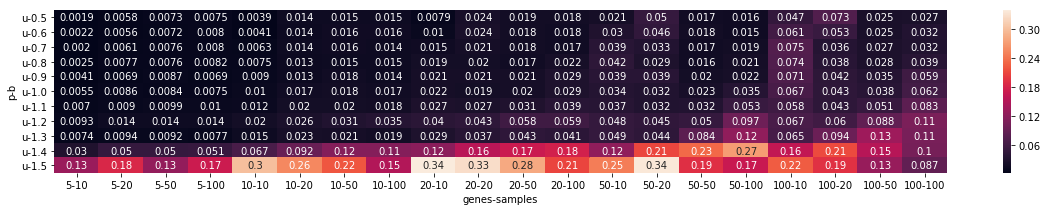

In [10]:
params = ["p","b"]
plot_file = img_outdir+"/" + tool_suffix+".J_rel.heatmap.svg"
heatmap_outfile =  tsv_outdir+ tool_suffix+".J_rel.heatmap.tsv"

heatmap = plot_performance_heatmap(results,params,top=20,
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [11]:
parameters

(('p', ['u']), ('b', [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]))

In [12]:
default_params = ("u",1.0)

In [13]:
r = get_opt_params(results, params, default_params=default_params, more_n_smaples = 0)
r

All 220 runs considered

with Optimal parameters (Relevance --> max):
	p=u;
	b=1.5;
	Max. avg. Relevance: 0.214 ± 0.075
	Max. avg. Recovery: 0.374 ± 0.167
	Max. avg. n_biclusters: 51.45 ± 34.494
With Default parameters:
	p=u;
	b=1.0;
	avg. Relevance: 0.026 ± 0.017
	avg. Recovery: 0.426 ± 0.119
	avg. n_biclusters: 614.05 ± 135.46


Relevance                                      Recovery                  \
           mean       std count       max       min      mean       std count   
p b                                                                             
u 1.5  0.214068  0.074693    20  0.339843  0.087274  0.373946  0.166656    20   
  1.4  0.133489  0.067256    20  0.272289  0.030238  0.413920  0.155343    20   
  1.3  0.048056  0.039929    20  0.133940  0.007436  0.429227  0.144293    20   
  1.2  0.046317  0.028201    20  0.108398  0.009319  0.435290  0.131780    20   
  1.1  0.031020  0.019649    20  0.083284  0.007044  0.434303  0.128774    20   
  1.0  0.025855  0.017015    20  0.066560  0.005452  0.425566  0.118672    20   
  0.9  0.024932  0.017824    20  0.070988  0.004081  0.404351  0.123813    20   
  0.8  0.022129  0.016549    20  0.074330  0.002477  0.383211  0.123026    20   
  0.7  0.021192  0.016433    20  0.075212  0.001984  0.364459  0.125444    20   
  0.6  0.021162  0.016213    20  0.060724  0.002223  0.345746  0.130901    20   
  0.5  0.020747  0.017699    20  0.073457  0.001927  0.318356  0.134404    20   

                          n_biclusters                             Relevance  
            max       min         mean         std count  max  min    n_runs  
p b                                                                           
u 1.5  0.681735  0.106077        51.45   34.494050    20  163    8       1.0  
  1.4  0.682231  0.171390        97.45   22.215393    20  151   45       1.0  
  1.3  0.631996  0.183249       420.65  157.163433    20  637   90       1.0  
  1.2  0.598044  0.190099       332.40   82.502568    20  408   54       1.0  
  1.1  0.602137  0.187215       525.25  111.037630    20  635  269       1.0  
  1.0  0.574016  0.158998       614.05  135.460025    20  744  303       1.0  
  0.9  0.541666  0.111860       660.70  145.018728    20  795  303       1.0  
  0.8  0.516569  0.030440       712.25  139.992434    20  859  391       1.0  
  0.7  0.504254  0.035242       742.75  145.147430    20  861  397       1.0  
  0.6  0.507608  0.026911       748.90  139.270241    20  878  388       1.0  
  0.5  0.472367  0.023701       776.10  128.145025    20  885  470       1.0